# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

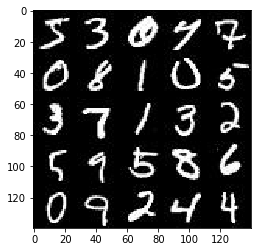

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

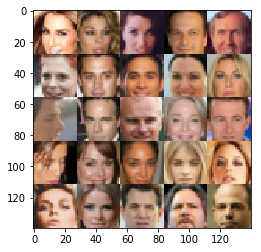

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

C:\Users\kamil\Anaconda3\envs\dog-project\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.9.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_height, image_width, image_channels), name="input_real")
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    
    with tf.variable_scope('discriminator', reuse=reuse):      
        # Input size 28x28x3
        x1 = tf.layers.conv2d(images, 32, 5, strides=2, 
                              kernel_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
        # No batch normalization
        # Leaky ReLU
        x1 = tf.maximum(alpha * x1, x1)
        # 14x14#32
        
        # Convolutional layers
        x2 = tf.layers.conv2d(x1, 64, 5, strides=2, 
                              kernel_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
        # Batch normalization
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, keep_prob=0.5)
        # 7x7x64
        
        x3 = tf.layers.conv2d(x2, 128, 5, strides=2, 
                              kernel_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, keep_prob=0.5)
        # 4x4x128
        
        x4 = tf.layers.conv2d(x3, 256, 5, strides=2, 
                              kernel_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
        x4 = tf.layers.batch_normalization(x4, training=True)
        x4 = tf.maximum(alpha * x4, x4)
        # 2x2x256
        
        # Reshape 
        to_dense = tf.reshape(x4, [-1, 2*2*256])
        logits = tf.layers.dense(to_dense, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    
    with tf.variable_scope('generator', reuse=(not is_train)):
        # Starting with fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        # Reshape
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        # Batch normalization
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        # Leaky Relu
        x1 = tf.maximum(x1 * alpha, x1)
        # 7x7x256
        
        # Convolutional layer
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, 
                                        kernel_initializer=tf.random_normal_initializer(stddev=0.02), padding="same")
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(x2 * alpha, x2)
        # 14x14x128
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, 
                                        kernel_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(x3 * alpha, x3)
        # 28x28x64
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, 
                                            kernel_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
        # 28x28x32
        
        out = tf.tanh(logits)
        
    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)
    
    # Defining labels here to shorten the discriminator definitions
    smooth = 0.1 
    loss_fake_labels = tf.zeros_like(d_model_fake)
    loss_real_labels = tf.ones_like(d_model_real) * (1 - smooth)
    g_loss_labels = tf.ones_like(d_model_fake)
    
    # Discriminator loss
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                                         labels=loss_real_labels))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                                         labels=loss_fake_labels))
    d_loss = d_loss_fake + d_loss_real
    
    # Generator loss
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                                    labels=g_loss_labels))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    
    # TODO: Implement Function
    # Get weight and bias to update
    t_vars = tf.trainable_variables()
    # Discriminator vars
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    # Generator vars
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    opts = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    # Optimizers
    with tf.control_dependencies(opts):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [19]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    discriminator_loss, generator_loss = model_loss(input_real, input_z, data_shape[3], alpha=0.2)
    d_train_opt, g_train_opt = model_opt(discriminator_loss, generator_loss, learning_rate, beta1)
    
    samples, losses = [], []
    steps = 0
    print_every = 20
    show_every = 100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                
                # Sample random noise for the generator
                batch_z = np.random.uniform(-1, 1, (batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, input_real: batch_images})
                
                # Print loss
                if steps % print_every == 0:
                    train_loss_d = discriminator_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = generator_loss.eval({input_z: batch_z})
                
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Append the losses to the list
                    losses.append((train_loss_d, train_loss_g))
                
                # Show output
                if steps % show_every == 0:
                       show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
        
        #saver.save(sess, './checkpoints/generator.ckpt')

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.6678... Generator Loss: 1.7313
Epoch 1/2... Discriminator Loss: 1.6265... Generator Loss: 1.4855
Epoch 1/2... Discriminator Loss: 1.4715... Generator Loss: 0.9535
Epoch 1/2... Discriminator Loss: 1.4068... Generator Loss: 0.5607
Epoch 1/2... Discriminator Loss: 1.4069... Generator Loss: 0.6138


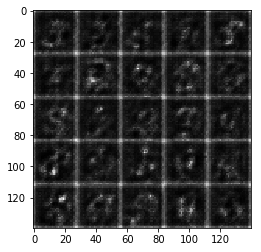

Epoch 1/2... Discriminator Loss: 1.3811... Generator Loss: 0.7811
Epoch 1/2... Discriminator Loss: 1.4119... Generator Loss: 0.6401
Epoch 1/2... Discriminator Loss: 1.5371... Generator Loss: 0.6766
Epoch 1/2... Discriminator Loss: 1.4243... Generator Loss: 0.9782
Epoch 1/2... Discriminator Loss: 1.3749... Generator Loss: 1.1111


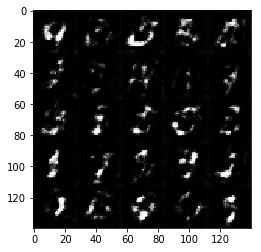

Epoch 1/2... Discriminator Loss: 1.3863... Generator Loss: 1.1846
Epoch 1/2... Discriminator Loss: 1.3918... Generator Loss: 0.6681
Epoch 1/2... Discriminator Loss: 1.3554... Generator Loss: 0.5770
Epoch 1/2... Discriminator Loss: 1.3697... Generator Loss: 0.6614
Epoch 1/2... Discriminator Loss: 1.3042... Generator Loss: 1.0962


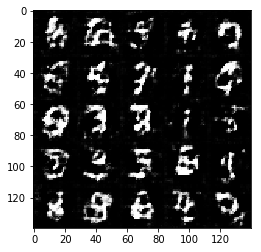

Epoch 1/2... Discriminator Loss: 1.3626... Generator Loss: 0.6615
Epoch 1/2... Discriminator Loss: 1.6383... Generator Loss: 0.3915
Epoch 1/2... Discriminator Loss: 1.3165... Generator Loss: 0.6071
Epoch 1/2... Discriminator Loss: 1.4289... Generator Loss: 0.4457
Epoch 1/2... Discriminator Loss: 1.3935... Generator Loss: 0.6519


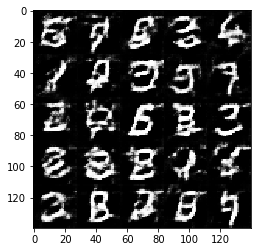

Epoch 1/2... Discriminator Loss: 1.3609... Generator Loss: 0.6570
Epoch 1/2... Discriminator Loss: 1.2555... Generator Loss: 0.8628
Epoch 1/2... Discriminator Loss: 1.4470... Generator Loss: 0.7609
Epoch 1/2... Discriminator Loss: 1.3382... Generator Loss: 0.6267
Epoch 1/2... Discriminator Loss: 1.3176... Generator Loss: 0.6504


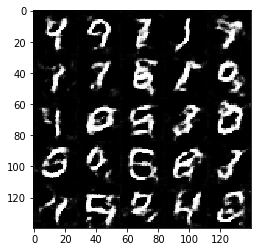

Epoch 1/2... Discriminator Loss: 1.5426... Generator Loss: 0.6473
Epoch 1/2... Discriminator Loss: 1.0649... Generator Loss: 0.8789
Epoch 1/2... Discriminator Loss: 1.3887... Generator Loss: 0.8379
Epoch 1/2... Discriminator Loss: 1.5183... Generator Loss: 0.4906
Epoch 1/2... Discriminator Loss: 1.1828... Generator Loss: 0.7711


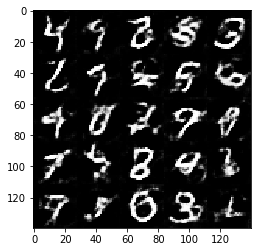

Epoch 1/2... Discriminator Loss: 1.3119... Generator Loss: 0.7021
Epoch 1/2... Discriminator Loss: 1.2726... Generator Loss: 1.3591
Epoch 1/2... Discriminator Loss: 1.3500... Generator Loss: 0.8402
Epoch 1/2... Discriminator Loss: 1.3386... Generator Loss: 0.5956
Epoch 1/2... Discriminator Loss: 1.4329... Generator Loss: 0.5266


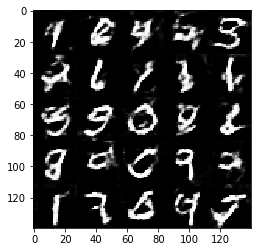

Epoch 1/2... Discriminator Loss: 1.4407... Generator Loss: 0.5491
Epoch 1/2... Discriminator Loss: 1.1701... Generator Loss: 0.9143
Epoch 1/2... Discriminator Loss: 1.4578... Generator Loss: 0.5035
Epoch 1/2... Discriminator Loss: 1.4031... Generator Loss: 0.7583
Epoch 1/2... Discriminator Loss: 1.4607... Generator Loss: 0.6297


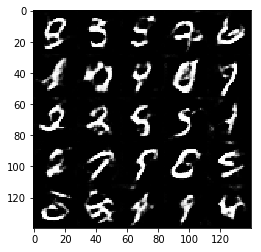

Epoch 1/2... Discriminator Loss: 1.3598... Generator Loss: 0.6032
Epoch 1/2... Discriminator Loss: 1.3003... Generator Loss: 0.4988
Epoch 1/2... Discriminator Loss: 1.4137... Generator Loss: 0.3576
Epoch 1/2... Discriminator Loss: 1.0965... Generator Loss: 0.7952
Epoch 1/2... Discriminator Loss: 1.4192... Generator Loss: 0.5750


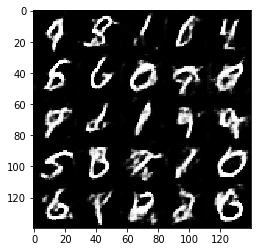

Epoch 1/2... Discriminator Loss: 1.2316... Generator Loss: 0.9967
Epoch 2/2... Discriminator Loss: 1.3666... Generator Loss: 0.6275
Epoch 2/2... Discriminator Loss: 1.2871... Generator Loss: 0.6080
Epoch 2/2... Discriminator Loss: 1.5365... Generator Loss: 0.3418
Epoch 2/2... Discriminator Loss: 1.2830... Generator Loss: 0.6328


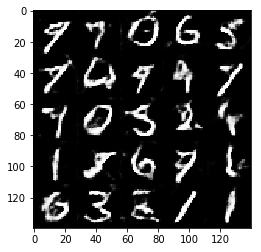

Epoch 2/2... Discriminator Loss: 1.2944... Generator Loss: 0.6502
Epoch 2/2... Discriminator Loss: 1.5349... Generator Loss: 0.4794
Epoch 2/2... Discriminator Loss: 1.2900... Generator Loss: 0.9459
Epoch 2/2... Discriminator Loss: 1.0760... Generator Loss: 0.8917
Epoch 2/2... Discriminator Loss: 1.2274... Generator Loss: 0.7644


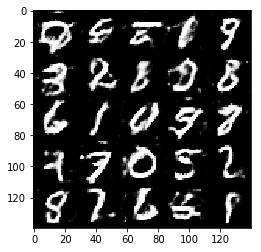

Epoch 2/2... Discriminator Loss: 1.1010... Generator Loss: 1.0840
Epoch 2/2... Discriminator Loss: 1.4542... Generator Loss: 1.0733
Epoch 2/2... Discriminator Loss: 1.4165... Generator Loss: 0.4972
Epoch 2/2... Discriminator Loss: 1.7961... Generator Loss: 0.4013
Epoch 2/2... Discriminator Loss: 1.4437... Generator Loss: 0.5850


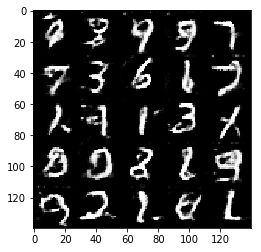

Epoch 2/2... Discriminator Loss: 1.5004... Generator Loss: 0.3837
Epoch 2/2... Discriminator Loss: 1.2248... Generator Loss: 0.7417
Epoch 2/2... Discriminator Loss: 1.1087... Generator Loss: 0.9019
Epoch 2/2... Discriminator Loss: 1.2331... Generator Loss: 0.6263
Epoch 2/2... Discriminator Loss: 1.3952... Generator Loss: 1.7624


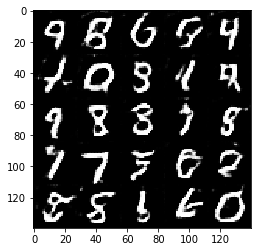

Epoch 2/2... Discriminator Loss: 1.3916... Generator Loss: 1.1259
Epoch 2/2... Discriminator Loss: 1.4402... Generator Loss: 0.5185
Epoch 2/2... Discriminator Loss: 1.0502... Generator Loss: 0.9540
Epoch 2/2... Discriminator Loss: 1.2193... Generator Loss: 0.6531
Epoch 2/2... Discriminator Loss: 1.1377... Generator Loss: 0.9007


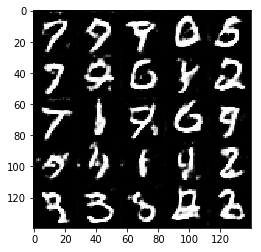

Epoch 2/2... Discriminator Loss: 1.1755... Generator Loss: 1.2781
Epoch 2/2... Discriminator Loss: 1.0684... Generator Loss: 1.3650
Epoch 2/2... Discriminator Loss: 1.0385... Generator Loss: 1.1945
Epoch 2/2... Discriminator Loss: 1.3447... Generator Loss: 1.6640
Epoch 2/2... Discriminator Loss: 1.0939... Generator Loss: 1.2687


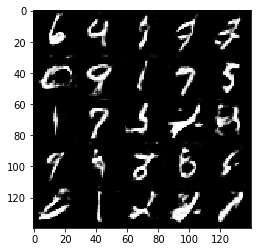

Epoch 2/2... Discriminator Loss: 0.9247... Generator Loss: 1.1920
Epoch 2/2... Discriminator Loss: 1.0723... Generator Loss: 1.6473
Epoch 2/2... Discriminator Loss: 1.1450... Generator Loss: 0.7586
Epoch 2/2... Discriminator Loss: 1.2884... Generator Loss: 0.6409
Epoch 2/2... Discriminator Loss: 1.0718... Generator Loss: 1.0051


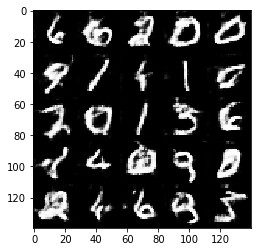

Epoch 2/2... Discriminator Loss: 1.4570... Generator Loss: 2.3203
Epoch 2/2... Discriminator Loss: 1.2797... Generator Loss: 0.4884
Epoch 2/2... Discriminator Loss: 1.1125... Generator Loss: 0.8369
Epoch 2/2... Discriminator Loss: 1.1545... Generator Loss: 0.5333
Epoch 2/2... Discriminator Loss: 1.5358... Generator Loss: 0.4860


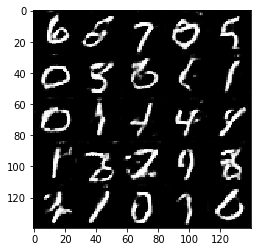

Epoch 2/2... Discriminator Loss: 1.6797... Generator Loss: 0.3228
Epoch 2/2... Discriminator Loss: 0.9204... Generator Loss: 1.0806
Epoch 2/2... Discriminator Loss: 1.0393... Generator Loss: 1.4423
Epoch 2/2... Discriminator Loss: 1.4792... Generator Loss: 0.4967
Epoch 2/2... Discriminator Loss: 1.2146... Generator Loss: 0.7766


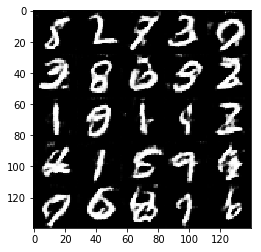

Epoch 2/2... Discriminator Loss: 1.0762... Generator Loss: 0.7676
Epoch 2/2... Discriminator Loss: 1.3582... Generator Loss: 0.7430
Epoch 2/2... Discriminator Loss: 1.1597... Generator Loss: 0.9369


In [20]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.8120... Generator Loss: 2.1369
Epoch 1/1... Discriminator Loss: 2.1270... Generator Loss: 3.0708
Epoch 1/1... Discriminator Loss: 1.1347... Generator Loss: 2.0315
Epoch 1/1... Discriminator Loss: 1.1168... Generator Loss: 1.4868
Epoch 1/1... Discriminator Loss: 1.4258... Generator Loss: 2.6512


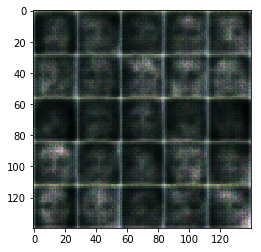

Epoch 1/1... Discriminator Loss: 0.8435... Generator Loss: 1.3911
Epoch 1/1... Discriminator Loss: 1.2508... Generator Loss: 2.0257
Epoch 1/1... Discriminator Loss: 1.6238... Generator Loss: 0.4577
Epoch 1/1... Discriminator Loss: 1.5756... Generator Loss: 0.4211
Epoch 1/1... Discriminator Loss: 1.1610... Generator Loss: 0.9508


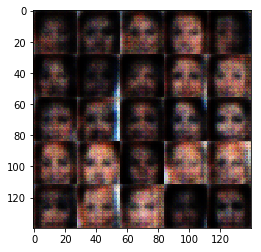

Epoch 1/1... Discriminator Loss: 1.8185... Generator Loss: 0.3271
Epoch 1/1... Discriminator Loss: 1.0513... Generator Loss: 1.2131
Epoch 1/1... Discriminator Loss: 1.4628... Generator Loss: 0.7878
Epoch 1/1... Discriminator Loss: 1.3239... Generator Loss: 0.5909
Epoch 1/1... Discriminator Loss: 1.6252... Generator Loss: 0.4598


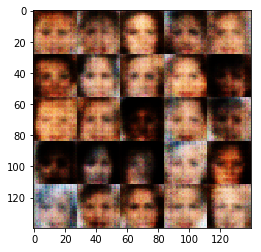

Epoch 1/1... Discriminator Loss: 1.7564... Generator Loss: 0.3289
Epoch 1/1... Discriminator Loss: 0.9327... Generator Loss: 1.1311
Epoch 1/1... Discriminator Loss: 1.4383... Generator Loss: 1.2843
Epoch 1/1... Discriminator Loss: 1.3283... Generator Loss: 0.8500
Epoch 1/1... Discriminator Loss: 1.1092... Generator Loss: 1.3681


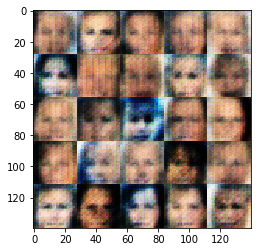

Epoch 1/1... Discriminator Loss: 1.2836... Generator Loss: 0.7009
Epoch 1/1... Discriminator Loss: 1.4699... Generator Loss: 1.4877
Epoch 1/1... Discriminator Loss: 0.8925... Generator Loss: 1.7212
Epoch 1/1... Discriminator Loss: 1.2968... Generator Loss: 1.3149
Epoch 1/1... Discriminator Loss: 1.4903... Generator Loss: 0.5307


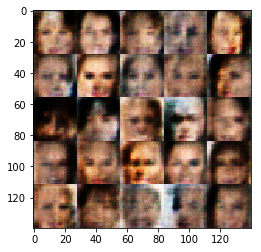

Epoch 1/1... Discriminator Loss: 1.3021... Generator Loss: 1.6397
Epoch 1/1... Discriminator Loss: 1.6805... Generator Loss: 1.4219
Epoch 1/1... Discriminator Loss: 1.3208... Generator Loss: 0.7608
Epoch 1/1... Discriminator Loss: 1.3614... Generator Loss: 0.7793
Epoch 1/1... Discriminator Loss: 1.5482... Generator Loss: 0.6460


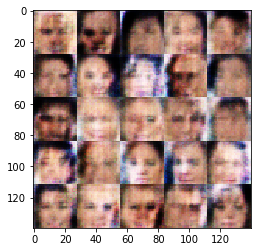

Epoch 1/1... Discriminator Loss: 1.5065... Generator Loss: 0.7568
Epoch 1/1... Discriminator Loss: 1.0693... Generator Loss: 1.6871
Epoch 1/1... Discriminator Loss: 1.3297... Generator Loss: 0.7420
Epoch 1/1... Discriminator Loss: 1.3044... Generator Loss: 0.7700
Epoch 1/1... Discriminator Loss: 1.2245... Generator Loss: 1.1356


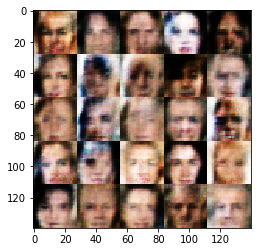

Epoch 1/1... Discriminator Loss: 1.0794... Generator Loss: 1.0094
Epoch 1/1... Discriminator Loss: 1.2423... Generator Loss: 0.6974
Epoch 1/1... Discriminator Loss: 1.7143... Generator Loss: 0.7301
Epoch 1/1... Discriminator Loss: 1.4389... Generator Loss: 0.8601
Epoch 1/1... Discriminator Loss: 1.4167... Generator Loss: 0.7490


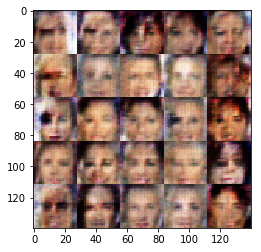

Epoch 1/1... Discriminator Loss: 1.4060... Generator Loss: 0.7945
Epoch 1/1... Discriminator Loss: 1.5180... Generator Loss: 0.8424
Epoch 1/1... Discriminator Loss: 1.4151... Generator Loss: 0.8123
Epoch 1/1... Discriminator Loss: 1.3573... Generator Loss: 0.8961
Epoch 1/1... Discriminator Loss: 1.3142... Generator Loss: 0.8160


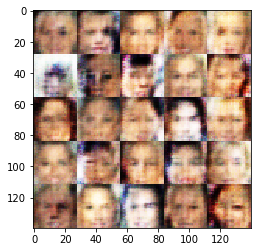

Epoch 1/1... Discriminator Loss: 1.4090... Generator Loss: 0.8422
Epoch 1/1... Discriminator Loss: 1.4290... Generator Loss: 0.8734
Epoch 1/1... Discriminator Loss: 1.3398... Generator Loss: 0.7616
Epoch 1/1... Discriminator Loss: 1.4878... Generator Loss: 0.8415
Epoch 1/1... Discriminator Loss: 1.3622... Generator Loss: 0.8686


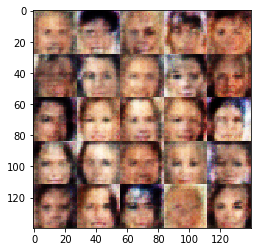

Epoch 1/1... Discriminator Loss: 1.2850... Generator Loss: 0.7675
Epoch 1/1... Discriminator Loss: 1.4007... Generator Loss: 0.7571
Epoch 1/1... Discriminator Loss: 1.4313... Generator Loss: 0.7836
Epoch 1/1... Discriminator Loss: 1.3921... Generator Loss: 0.7967
Epoch 1/1... Discriminator Loss: 1.3387... Generator Loss: 0.7568


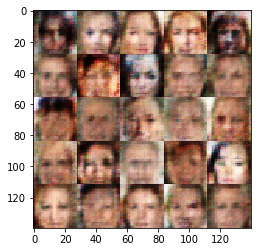

Epoch 1/1... Discriminator Loss: 1.3827... Generator Loss: 0.8243
Epoch 1/1... Discriminator Loss: 1.3009... Generator Loss: 0.8687
Epoch 1/1... Discriminator Loss: 1.3387... Generator Loss: 0.8030
Epoch 1/1... Discriminator Loss: 1.3048... Generator Loss: 0.7390
Epoch 1/1... Discriminator Loss: 1.3449... Generator Loss: 0.8065


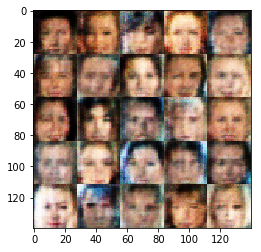

Epoch 1/1... Discriminator Loss: 1.3979... Generator Loss: 0.8417
Epoch 1/1... Discriminator Loss: 1.3987... Generator Loss: 0.7504
Epoch 1/1... Discriminator Loss: 1.3326... Generator Loss: 0.8372
Epoch 1/1... Discriminator Loss: 1.3603... Generator Loss: 0.8258
Epoch 1/1... Discriminator Loss: 1.3572... Generator Loss: 0.8208


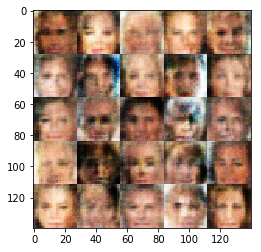

Epoch 1/1... Discriminator Loss: 1.3900... Generator Loss: 0.8079
Epoch 1/1... Discriminator Loss: 1.4113... Generator Loss: 0.7266
Epoch 1/1... Discriminator Loss: 1.4031... Generator Loss: 0.8695
Epoch 1/1... Discriminator Loss: 1.4287... Generator Loss: 0.7771
Epoch 1/1... Discriminator Loss: 1.3819... Generator Loss: 0.7576


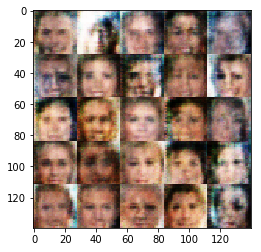

Epoch 1/1... Discriminator Loss: 1.4102... Generator Loss: 0.8334
Epoch 1/1... Discriminator Loss: 1.3839... Generator Loss: 0.8049
Epoch 1/1... Discriminator Loss: 1.3516... Generator Loss: 0.8395
Epoch 1/1... Discriminator Loss: 1.3662... Generator Loss: 0.8626
Epoch 1/1... Discriminator Loss: 1.3852... Generator Loss: 0.8200


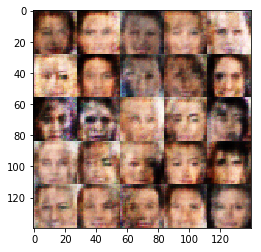

Epoch 1/1... Discriminator Loss: 1.3270... Generator Loss: 0.8322
Epoch 1/1... Discriminator Loss: 1.3401... Generator Loss: 0.8362
Epoch 1/1... Discriminator Loss: 1.3832... Generator Loss: 0.7630
Epoch 1/1... Discriminator Loss: 1.3774... Generator Loss: 0.7948
Epoch 1/1... Discriminator Loss: 1.4247... Generator Loss: 0.8476


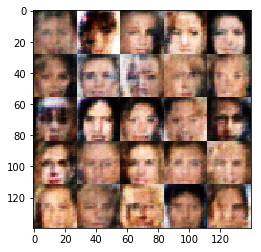

Epoch 1/1... Discriminator Loss: 1.3725... Generator Loss: 0.8225
Epoch 1/1... Discriminator Loss: 1.3611... Generator Loss: 0.7651
Epoch 1/1... Discriminator Loss: 1.4232... Generator Loss: 0.7973
Epoch 1/1... Discriminator Loss: 1.3195... Generator Loss: 0.8322
Epoch 1/1... Discriminator Loss: 1.3581... Generator Loss: 0.7985


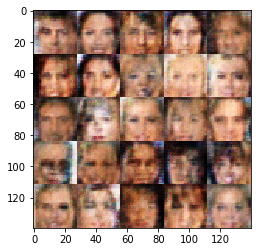

Epoch 1/1... Discriminator Loss: 1.2967... Generator Loss: 0.8233
Epoch 1/1... Discriminator Loss: 1.3464... Generator Loss: 0.7765
Epoch 1/1... Discriminator Loss: 1.3738... Generator Loss: 0.7256
Epoch 1/1... Discriminator Loss: 1.3269... Generator Loss: 0.8437
Epoch 1/1... Discriminator Loss: 1.3678... Generator Loss: 0.8325


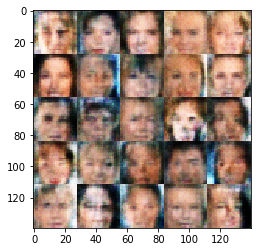

Epoch 1/1... Discriminator Loss: 1.4420... Generator Loss: 0.7686
Epoch 1/1... Discriminator Loss: 1.3754... Generator Loss: 0.7770
Epoch 1/1... Discriminator Loss: 1.3733... Generator Loss: 0.8116
Epoch 1/1... Discriminator Loss: 1.4436... Generator Loss: 0.6997
Epoch 1/1... Discriminator Loss: 1.4008... Generator Loss: 0.7640


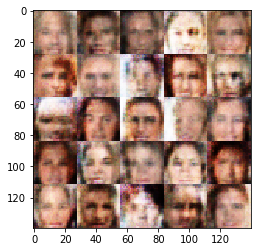

Epoch 1/1... Discriminator Loss: 1.3339... Generator Loss: 0.8684
Epoch 1/1... Discriminator Loss: 1.3789... Generator Loss: 0.7786
Epoch 1/1... Discriminator Loss: 1.3746... Generator Loss: 0.7842
Epoch 1/1... Discriminator Loss: 1.3446... Generator Loss: 1.0190
Epoch 1/1... Discriminator Loss: 1.3371... Generator Loss: 0.7851


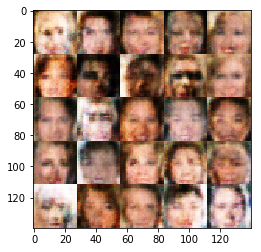

Epoch 1/1... Discriminator Loss: 1.3870... Generator Loss: 0.8151
Epoch 1/1... Discriminator Loss: 1.4307... Generator Loss: 0.7094
Epoch 1/1... Discriminator Loss: 1.3647... Generator Loss: 0.7735
Epoch 1/1... Discriminator Loss: 1.3537... Generator Loss: 0.8924
Epoch 1/1... Discriminator Loss: 1.3141... Generator Loss: 0.6999


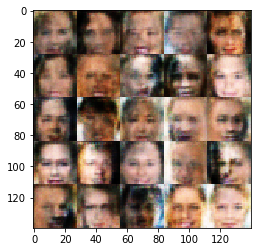

Epoch 1/1... Discriminator Loss: 1.3759... Generator Loss: 0.7803
Epoch 1/1... Discriminator Loss: 1.3967... Generator Loss: 0.8392
Epoch 1/1... Discriminator Loss: 1.3841... Generator Loss: 0.7559
Epoch 1/1... Discriminator Loss: 1.3488... Generator Loss: 0.7963
Epoch 1/1... Discriminator Loss: 1.3785... Generator Loss: 0.7896


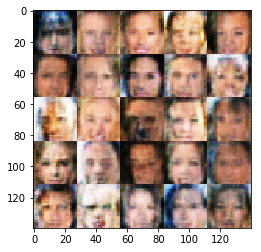

Epoch 1/1... Discriminator Loss: 1.3179... Generator Loss: 0.8428
Epoch 1/1... Discriminator Loss: 1.3830... Generator Loss: 0.7867
Epoch 1/1... Discriminator Loss: 1.3764... Generator Loss: 0.7540
Epoch 1/1... Discriminator Loss: 1.4478... Generator Loss: 0.7663
Epoch 1/1... Discriminator Loss: 1.2970... Generator Loss: 1.0651


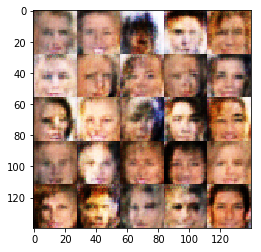

Epoch 1/1... Discriminator Loss: 1.3508... Generator Loss: 0.7011
Epoch 1/1... Discriminator Loss: 1.3219... Generator Loss: 0.9393
Epoch 1/1... Discriminator Loss: 1.3423... Generator Loss: 0.9090
Epoch 1/1... Discriminator Loss: 1.3951... Generator Loss: 0.7069
Epoch 1/1... Discriminator Loss: 1.3999... Generator Loss: 0.7933


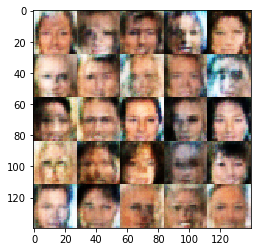

Epoch 1/1... Discriminator Loss: 1.3024... Generator Loss: 0.7297
Epoch 1/1... Discriminator Loss: 1.2464... Generator Loss: 1.1591
Epoch 1/1... Discriminator Loss: 1.3883... Generator Loss: 0.7329
Epoch 1/1... Discriminator Loss: 1.3714... Generator Loss: 0.7852
Epoch 1/1... Discriminator Loss: 1.3853... Generator Loss: 0.7774


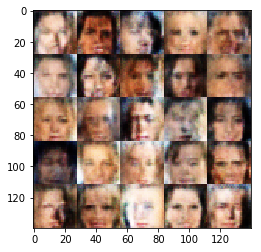

Epoch 1/1... Discriminator Loss: 1.2737... Generator Loss: 0.8266
Epoch 1/1... Discriminator Loss: 1.3688... Generator Loss: 0.6260
Epoch 1/1... Discriminator Loss: 1.4377... Generator Loss: 0.6515
Epoch 1/1... Discriminator Loss: 1.3641... Generator Loss: 0.7442
Epoch 1/1... Discriminator Loss: 1.3779... Generator Loss: 0.7506


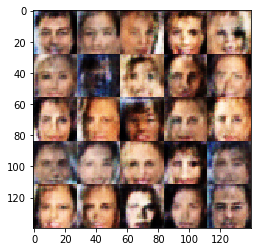

Epoch 1/1... Discriminator Loss: 1.3216... Generator Loss: 0.6903
Epoch 1/1... Discriminator Loss: 1.4011... Generator Loss: 0.7863
Epoch 1/1... Discriminator Loss: 1.3334... Generator Loss: 0.9611
Epoch 1/1... Discriminator Loss: 1.4290... Generator Loss: 0.7460
Epoch 1/1... Discriminator Loss: 1.4386... Generator Loss: 0.5851


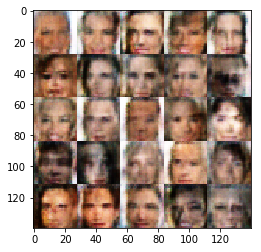

Epoch 1/1... Discriminator Loss: 1.4136... Generator Loss: 0.7994
Epoch 1/1... Discriminator Loss: 1.3768... Generator Loss: 0.7986
Epoch 1/1... Discriminator Loss: 1.3674... Generator Loss: 0.7694
Epoch 1/1... Discriminator Loss: 1.3733... Generator Loss: 0.8915
Epoch 1/1... Discriminator Loss: 1.4063... Generator Loss: 0.5973


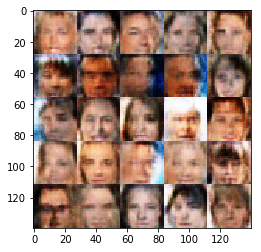

Epoch 1/1... Discriminator Loss: 1.4039... Generator Loss: 0.9358
Epoch 1/1... Discriminator Loss: 1.3662... Generator Loss: 0.9500
Epoch 1/1... Discriminator Loss: 1.3961... Generator Loss: 0.8655
Epoch 1/1... Discriminator Loss: 1.3208... Generator Loss: 0.7939
Epoch 1/1... Discriminator Loss: 1.3388... Generator Loss: 0.8009


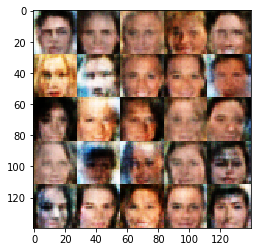

Epoch 1/1... Discriminator Loss: 1.3106... Generator Loss: 0.8650
Epoch 1/1... Discriminator Loss: 1.4323... Generator Loss: 0.8154
Epoch 1/1... Discriminator Loss: 1.3135... Generator Loss: 0.8273
Epoch 1/1... Discriminator Loss: 1.3077... Generator Loss: 0.7972
Epoch 1/1... Discriminator Loss: 1.3707... Generator Loss: 0.8046


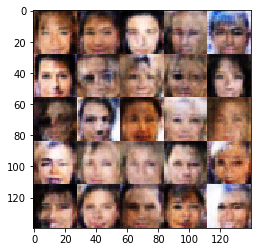

Epoch 1/1... Discriminator Loss: 1.4169... Generator Loss: 0.6467
Epoch 1/1... Discriminator Loss: 1.4690... Generator Loss: 0.8186
Epoch 1/1... Discriminator Loss: 1.3560... Generator Loss: 0.8104
Epoch 1/1... Discriminator Loss: 1.3601... Generator Loss: 0.8612
Epoch 1/1... Discriminator Loss: 1.3677... Generator Loss: 0.7529


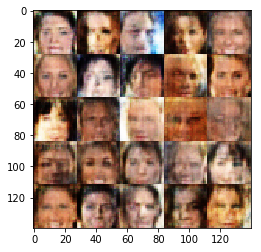

Epoch 1/1... Discriminator Loss: 1.3314... Generator Loss: 0.8588
Epoch 1/1... Discriminator Loss: 1.2720... Generator Loss: 0.9159
Epoch 1/1... Discriminator Loss: 1.3561... Generator Loss: 0.6436


In [22]:
batch_size = 64
z_dim = 100
learning_rate = 0.0003
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.